In [92]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)
import datetime as tf 
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [93]:

path = 'City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv' 
df = pd.read_csv(path)
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [94]:
df_demo=df.head(4)
df_demo

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


# Part 1

In [95]:
df_demo.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [96]:
df_conv = pd.melt(df_demo, id_vars=['RegionID','SizeRank','RegionName','RegionType', 'StateName', 'State' ,'Metro','CountyName'],var_name='Date', value_name=' ZHVI')
df_conv

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,ZHVI
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [97]:
df_conv['State'].value_counts()

NY    273
CA    273
TX    273
IL    273
Name: State, dtype: int64

In [98]:
# long -form data 
df_conv['Date']= pd.to_datetime(df_conv['Date'])
# set index 
df_conv=df_conv.set_index('Date')
# data info : 
print(df_conv.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8    ZHVI       1087 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB
None


In [99]:
df_conv

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,ZHVI
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [100]:
df_conv['RegionName'].value_counts()

New York       273
Los Angeles    273
Houston        273
Chicago        273
Name: RegionName, dtype: int64

In [101]:
# Resample the dataframe as monthly frequency, grouped by City 
df_ts = df_conv.groupby('RegionName').resample('M').sum()
df_ts = df_ts.drop (columns= ['RegionID' ,'SizeRank'])
df_ts

C:\Users\Ashraf\AppData\Local\Temp\ipykernel_3212\2738954713.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = df_conv.groupby('RegionName').resample('M').sum()
C:\Users\Ashraf\AppData\Local\Temp\ipykernel_3212\2738954713.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = df_conv.groupby('RegionName').resample('M').sum()
C:\Users\Ashraf\AppData\Local\Temp\ipykernel_3212\2738954713.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

ZHVI
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

# Part 2

In [102]:
# Plot the home values for all 4 cities 
df_unstack = df_ts.unstack(0)
df_unstack.columns

MultiIndex([(' ZHVI',     'Chicago'),
            (' ZHVI',     'Houston'),
            (' ZHVI', 'Los Angeles'),
            (' ZHVI',    'New York')],
           names=[None, 'RegionName'])

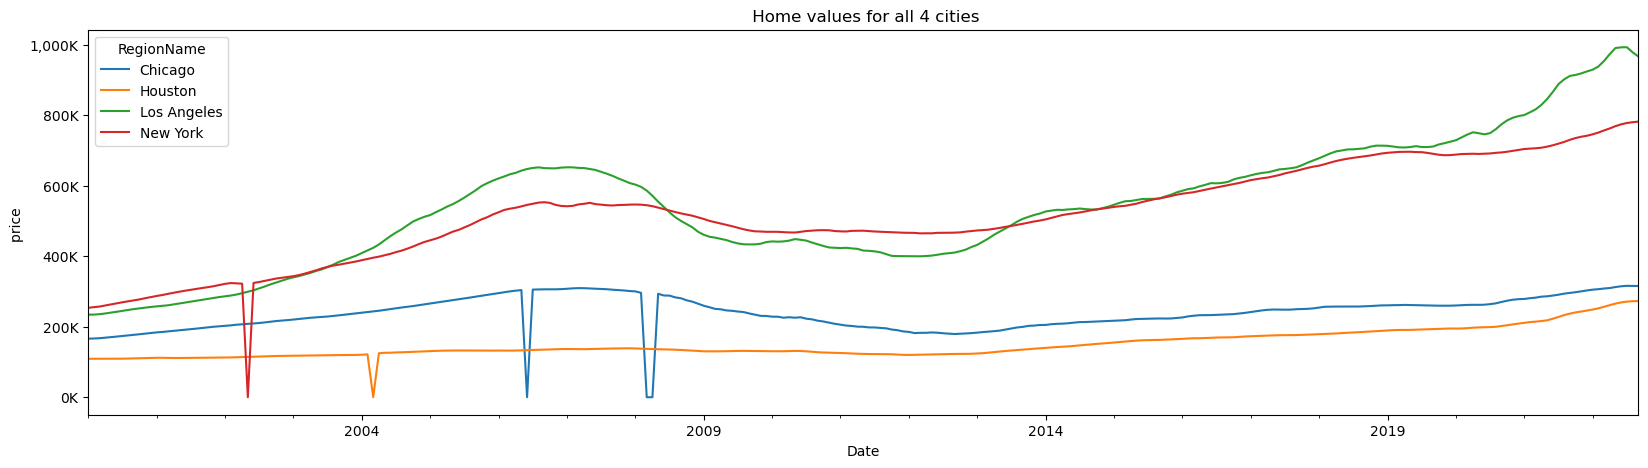

In [112]:
ax = df_unstack[' ZHVI'].plot(figsize=(20,5))
ax.set_xlabel('Date')
ax.set_ylabel('price ')
ax.set_title(' Home values for all 4 cities')
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

str_k = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(str_k)



In [142]:
# Which City had the highest Typical Home Value at the end of 2008? Which had the least? 
val_date = df_unstack.loc[pd.IndexSlice['2008-12',:]].idxmin()
print(val_date)
print(df_unstack.loc[pd.IndexSlice['2008-12',:]].max())

       RegionName 
 ZHVI  Chicago       2008-12-31
       Houston       2008-12-31
       Los Angeles   2008-12-31
       New York      2008-12-31
dtype: datetime64[ns]
       RegionName 
 ZHVI  Chicago        265306.0
       Houston        131283.0
       Los Angeles    469294.0
       New York       510309.0
dtype: float64


In [141]:
val_date = df_unstack.loc[pd.IndexSlice['2008-12',:]].idxmin()
print(val_date)
print(df_unstack.loc[pd.IndexSlice['2008-12',:]].min())

       RegionName 
 ZHVI  Chicago       2008-03-31
       Houston       2008-12-31
       Los Angeles   2008-12-31
       New York      2008-12-31
dtype: datetime64[ns]
       RegionName 
 ZHVI  Chicago        265306.0
       Houston        131283.0
       Los Angeles    469294.0
       New York       510309.0
dtype: float64


In [140]:
# How much did the home values change from November 2008 to December 2008 (in dollars)?
demo  =  df_unstack.loc['2008-11':'2008-12']
df_diff = demo.diff()
df_diff

ZHVI                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-11-30     NaN     NaN         NaN      NaN
2008-12-31 -5753.0  -964.0    -12611.0  -4458.0